In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr
import seaborn as sns
import os

In [2]:
# load data
data = pd.read_excel('model_data_S_not_zero_absERROR_NotVent.xlsx').drop(columns = ["Unnamed: 0"])
data_all_s = pd.read_excel('model_data_allS_absERROR_notVent.xlsx').drop(columns = ["Unnamed: 0"])
data

,lh_bankssts_volume,lh_caudalanteriorcingulate_volume,lh_caudalmiddlefrontal_volume,lh_cuneus_volume,lh_entorhinal_volume,lh_fusiform_volume,lh_inferiorparietal_volume,lh_inferiortemporal_volume,lh_isthmuscingulate_volume,lh_lateraloccipital_volume,...,age_mri,precuneus_volume,-VentralDC,pericalcarine_volume,-Hippocampus,Putamen,Caudate,S,abs_error_estimate,gender_F
0,0.002964,0.002256,0.008136,0.003394,0.002366,0.010357,0.015142,0.011369,0.003066,0.012157,...,19,0.010798,0.004498,0.002535,0.004372,0.005117,0.004709,0.071429,13.80,1
1,0.002344,0.001850,0.005794,0.003879,0.002107,0.009607,0.012305,0.009720,0.002845,0.013617,...,23,0.009305,0.003978,0.002612,0.003825,0.004903,0.003575,0.468056,23.75,1
2,0.002534,0.002797,0.006291,0.002592,0.002028,0.008790,0.012013,0.012749,0.002957,0.012521,...,19,0.010651,0.004404,0.001743,0.004377,0.005053,0.003914,0.370714,28.60,1
3,0.003097,0.001501,0.006358,0.003707,0.001096,0.009258,0.013345,0.010357,0.002457,0.015477,...,18,0.010617,0.003842,0.002555,0.003565,0.005305,0.003608,0.047222,33.80,0
4,0.001972,0.002460,0.007522,0.003739,0.001428,0.009609,0.010374,0.008492,0.002886,0.013569,...,18,0.010552,0.003802,0.003304,0.003456,0.004619,0.003857,0.400928,14.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.002753,0.002395,0.005985,0.002600,0.001503,0.010023,0.012704,0.012537,0.002785,0.013129,...,19,0.009620,0.004608,0.002107,0.004487,0.006393,0.004437,0.190540,10.80,1
137,0.002515,0.001864,0.007071,0.003184,0.002057,0.009190,0.013648,0.012823,0.003270,0.010043,...,22,0.011233,0.003766,0.002369,0.003947,0.004982,0.003704,0.227739,19.80,0
138,0.002578,0.001552,0.007039,0.003653,0.002337,0.010593,0.012364,0.010617,0.002702,0.014111,...,22,0.010226,0.004725,0.002690,0.004314,0.005037,0.004465,0.314423,22.00,0
139,0.002340,0.001347,0.007087,0.002897,0.002138,0.009919,0.014293,0.011200,0.002929,0.012897,...,20,0.010535,0.003965,0.002674,0.003505,0.004694,0.003493,0.213333,12.60,0


N all S:  159
max S:  0.5490259740259741
mean S:  0.21413959945726543
std S:  0.13377208678146782
median S:  0.2133333333333334

N non zero S:  141
max S:  0.5490259740259741
mean S:  0.24147656960074612
std S:  0.11639314301808892
median S:  0.2366013071895424


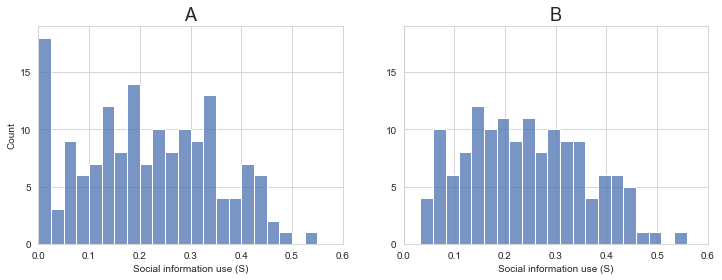

In [3]:
sns.set_style("whitegrid")

print("N all S: ", len(data_all_s))

print("max S: ", data_all_s.S.max())
print("mean S: ", data_all_s.S.mean())
print("std S: ", data_all_s.S.std())
print("median S: ", data_all_s.S.median())
print()
print("N non zero S: ", len(data))
print("max S: ", data.S.max())
print("mean S: ", data.S.mean())
print("std S: ", data.S.std())
print("median S: ", data.S.median())

fig, ax = plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(4)
sns.set(font_scale = 1.5)
sns.histplot(x = data_all_s.S, binwidth = 0.025, ax = ax[0]).set(xlim = (0, 0.6), ylim = (0,19), xlabel = 'Social information use (S)', title = 'A')
sns.histplot(x = data.S, binwidth = 0.025, ax = ax[1]).set(xlim = (0, 0.6), ylim = (0, 19), xlabel = 'Social information use (S)', title = 'B')
ax[1].set(ylabel=None)
fig.savefig('histogram_all_S.png', bbox_inches='tight')

In [47]:
data.S.min()

0.03333333333333333

**CORRELATIONS WITH S**

In [4]:
# print number of correlations

print("left postcentral + abs error: ", pearsonr(data['abs_error_estimate'], data['lh_postcentral_volume']))
print("left postcentral + S: ", pearsonr(data['S'], data['lh_postcentral_volume']))
print()

print("right postcentral + abs error: ", pearsonr(data['abs_error_estimate'], data['rh_postcentral_volume']))
print("right postcentral + S: ", pearsonr(data['S'], data['rh_postcentral_volume']))
print()

print("abs error + S: ", pearsonr(data['abs_error_estimate'], data['S']))
print()

print("pars triangularis + S: ", pearsonr(data['lh_parstriangularis_volume'], data['S']))
print("pars triangularis + abs error: ", pearsonr(data['lh_parstriangularis_volume'], data['abs_error_estimate']))
print()

print("left pallidum + S: ", pearsonr(data['Left-Pallidum'], data['S']))
print("left pallidum + abs error: ", pearsonr(data['Left-Pallidum'], data['abs_error_estimate']))
print()

print("right entorhinal + S: ", pearsonr(data['rh_entorhinal_volume'], data['S']))
print("right entorhinal + abs error: ", pearsonr(data['rh_entorhinal_volume'], data['abs_error_estimate']))
print()

print("left entorhinal + S: ", pearsonr(data['lh_entorhinal_volume'], data['S']))
print("left entorhinal + abs error: ", pearsonr(data['lh_entorhinal_volume'], data['abs_error_estimate']))
print()

print("left caudal middle frontal + S: ", pearsonr(data['lh_caudalmiddlefrontal_volume'], data['S']))
print("left caudal middle frontal + abs error: ", pearsonr(data['lh_caudalmiddlefrontal_volume'], data['abs_error_estimate']))

left postcentral + abs error:  (-0.10135319798345133, 0.23174666597833438)
left postcentral + S:  (-0.17685925371163871, 0.03590860726159266)

right postcentral + abs error:  (-0.23714345995445218, 0.004635042764731409)
right postcentral + S:  (-0.18026999216504966, 0.032428413114651125)

abs error + S:  (0.1570391204939738, 0.06292895872564727)

pars triangularis + S:  (0.2607007315653742, 0.0017946313990415644)
pars triangularis + abs error:  (0.029729557073673744, 0.7263733202825762)

left pallidum + S:  (0.16411625457089224, 0.051819311499773445)
left pallidum + abs error:  (0.041676294634355994, 0.6236480963739632)

right entorhinal + S:  (0.17737543576972928, 0.03536250775456379)
right entorhinal + abs error:  (0.1348573177592265, 0.11085104608055697)

left entorhinal + S:  (0.1728705731045399, 0.04037305650581314)
left entorhinal + abs error:  (0.023713603144047763, 0.7801556949971882)

left caudal middle frontal + S:  (-0.18996967950112448, 0.024053594437802295)
left caudal mid

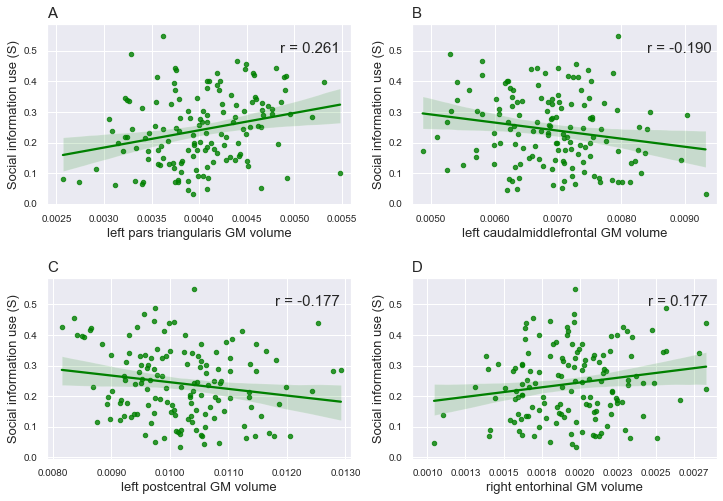

In [7]:
import seaborn as sns
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(12)
fig.set_figheight(8)

x = data['lh_parstriangularis_volume']
y = data['S']
sns.regplot(ax = axs[0,0], x= x, y = y, color = 'green', ci = 95, scatter_kws={'s':20}).set(xlabel=None, ylabel=None)
axs[0,0].set_ylabel('Social information use (S)', fontsize = 13)
axs[0,0].set_xlabel('left pars triangularis GM volume', fontsize = 13)
axs[0,0].set_title('A', fontsize = 15, loc = 'left')
axs[0,0].text(0.0050 - 0.00015, 0.53, "r = 0.261", ha="left", va="top", fontsize = 15)
axs[0,0].set(xlim = (0.0024, 0.0056))
xlabels = ['{:,.4f}'.format(x) for x in axs[0,0].get_xticks()]
axs[0,0].set_xticklabels(xlabels)


x = data['lh_postcentral_volume']
y = data['S']
sns.regplot(ax = axs[1,0], x= x, y = y, color = 'green', ci = 95, scatter_kws={'s':20}).set(xlabel=None, ylabel=None)
axs[1,0].set_ylabel('Social information use (S)', fontsize = 13)
axs[1,0].set_xlabel('left postcentral GM volume', fontsize = 13)
axs[1,0].set_title('C', fontsize = 15, loc = 'left')
axs[1,0].text(0.012 - 0.0002, 0.53, "r = -0.177", ha="left", va="top", fontsize = 15)
axs[1,0].set(xlim = (0.0079, 0.0131))
xlabels = ['{:,.4f}'.format(x) for x in axs[1,0].get_xticks()]
axs[1,0].set_xticklabels(xlabels)

x = data['lh_caudalmiddlefrontal_volume']
y = data['S']
sns.regplot(ax = axs[0,1], x= x, y = y, color = 'green', ci = 95, scatter_kws={'s':20}).set(xlabel=None, ylabel=None)
axs[0,1].set_ylabel('Social information use (S)', fontsize = 13)
axs[0,1].set_xlabel('left caudalmiddlefrontal GM volume', fontsize = 13)
axs[0,1].set_title('B', fontsize = 15, loc = 'left')
axs[0,1].text(0.0084, 0.53, "r = -0.190", ha="left", va="top", fontsize = 15)
axs[0,1].set(xlim = (0.0047, 0.0095))
xlabels = ['{:,.4f}'.format(x) for x in axs[0,1].get_xticks()]
axs[0,1].set_xticklabels(xlabels)

x = data['rh_entorhinal_volume']
y = data['S']
sns.regplot(ax = axs[1,1], x= x, y = y, color = 'green', ci = 95, scatter_kws={'s':20}).set(xlabel=None, ylabel=None)
axs[1,1].set_ylabel('Social information use (S)', fontsize = 13)
axs[1,1].set_xlabel('right entorhinal GM volume', fontsize = 13)
axs[1,1].set_title('D', fontsize = 15, loc = 'left')
axs[1,1].text(0.00245, 0.53, "r = 0.177", ha="left", va="top", fontsize = 15)
axs[1,1].set(xlim = (0.0009, 0.0029))
xlabels = ['{:,.4f}'.format(x) for x in axs[1,1].get_xticks()]
axs[1,1].set_xticklabels(xlabels)

plt.subplots_adjust(hspace = 0.4)
sns.set(font_scale = 0.91)
plt.savefig('S_correlation_plots.png', bbox_inches='tight')

plt.show()

**CORRELATIONS WITH ABS ERROR**

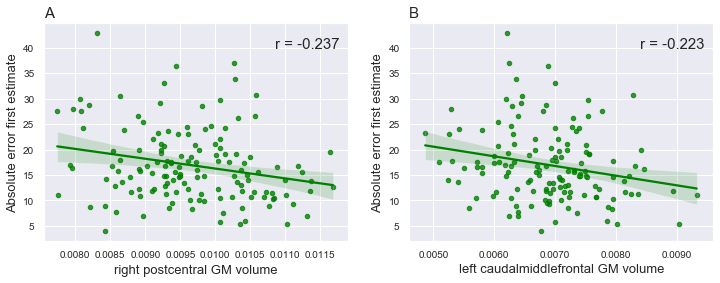

In [6]:
import seaborn as sns

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(12)
# fig.set_figheight(12)

x = data['rh_postcentral_volume']
y = data['abs_error_estimate']
sns.regplot(ax = axs[0], x= x, y = y, color = 'green', ci = 95, scatter_kws={'s':20}).set(xlabel=None, ylabel=None)
axs[0].set_ylabel('Absolute error first estimate', fontsize = 13)
axs[0].set_xlabel('right postcentral GM volume', fontsize = 13)
axs[0].set_title('A', fontsize = 15, loc = 'left')
axs[0].text(0.01085, 42, "r = -0.237", ha="left", va="top",  fontsize = 15)
axs[0].set(xlim = (0.00755, 0.0119))
xlabels = ['{:,.4f}'.format(x) for x in axs[0].get_xticks()]
axs[0].set_xticklabels(xlabels)

x = data['lh_caudalmiddlefrontal_volume']
y = data['abs_error_estimate']
sns.regplot(ax = axs[1], x= x, y = y, color = 'green', ci = 95, scatter_kws={'s':20}).set(xlabel=None, ylabel=None)
axs[1].set_ylabel('Absolute error first estimate', fontsize = 13)
axs[1].set_xlabel('left caudalmiddlefrontal GM volume', fontsize = 13)
axs[1].set_title('B', fontsize = 15, loc = 'left')
axs[1].text(0.0084, 42, "r = -0.223", ha="left", va="top", fontsize = 15)
axs[1].set(xlim = (0.0046, 0.0096))
xlabels = ['{:,.4f}'.format(x) for x in axs[1].get_xticks()]
axs[1].set_xticklabels(xlabels)

sns.set(font_scale = 0.91)

plt.savefig('error_postcentral_caudal.png', bbox_inches='tight')

plt.show()

# **ALL S**

In [7]:
# print number of correlations

print("left postcentral + abs error: ", pearsonr(data_all_s['abs_error_estimate'], data_all_s['lh_postcentral_volume']))
print("left postcentral + S: ", pearsonr(data_all_s['S'], data_all_s['lh_postcentral_volume']))
print()

print("right postcentral + abs error: ", pearsonr(data_all_s['abs_error_estimate'], data_all_s['rh_postcentral_volume']))
print("right postcentral + S: ", pearsonr(data_all_s['S'], data_all_s['rh_postcentral_volume']))
print()

print("abs error + S: ", pearsonr(data_all_s['abs_error_estimate'], data_all_s['S']))
print()

print("pars triangularis + S: ", pearsonr(data_all_s['lh_parstriangularis_volume'], data_all_s['S']))
print("pars triangularis + abs error: ", pearsonr(data_all_s['lh_parstriangularis_volume'], data_all_s['abs_error_estimate']))
print()

print("left pallidum + S: ", pearsonr(data_all_s['Left-Pallidum'], data_all_s['S']))
print("left pallidum + abs error: ", pearsonr(data_all_s['Left-Pallidum'], data_all_s['abs_error_estimate']))
print()

print("right entorhinal + S: ", pearsonr(data_all_s['rh_entorhinal_volume'], data_all_s['S']))
print("right entorhinal + abs error: ", pearsonr(data_all_s['rh_entorhinal_volume'], data_all_s['abs_error_estimate']))
print()

print("left entorhinal + S: ", pearsonr(data_all_s['lh_entorhinal_volume'], data_all_s['S']))
print("left entorhinal + abs error: ", pearsonr(data_all_s['lh_entorhinal_volume'], data_all_s['abs_error_estimate']))
print()

print("left caudal middle frontal + S: ", pearsonr(data_all_s['lh_caudalmiddlefrontal_volume'], data_all_s['S']))
print("left caudal middle frontal + abs error: ", pearsonr(data_all_s['lh_caudalmiddlefrontal_volume'], data_all_s['abs_error_estimate']))

left postcentral + abs error:  (-0.14323298343685512, 0.07167964966596725)
left postcentral + S:  (-0.10988978349573929, 0.1679243327450922)

right postcentral + abs error:  (-0.2507424292871692, 0.0014332003081648453)
right postcentral + S:  (-0.13730516934785414, 0.0843698316973984)

abs error + S:  (0.030237715099731607, 0.7051622761348081)

pars triangularis + S:  (0.25780202075926595, 0.0010353249818862902)
pars triangularis + abs error:  (0.010815047930563454, 0.8923742816779954)

left pallidum + S:  (0.18035847065910948, 0.022907196185853292)
left pallidum + abs error:  (0.0298625868185701, 0.7086534435319121)

right entorhinal + S:  (0.1155045420620501, 0.14710810424355233)
right entorhinal + abs error:  (0.14721735568163827, 0.06405508698310816)

left entorhinal + S:  (0.16833473209584301, 0.033919104287713844)
left entorhinal + abs error:  (0.07261006988189211, 0.3630570632851573)

left caudal middle frontal + S:  (-0.06005243675690232, 0.452089148740239)
left caudal middle f

In [15]:
# check correlations with data including participants with no social information use
features_interest = ['lh_parstriangularis_volume', 'rh_parstriangularis_volume', 
                     'lh_postcentral_volume', 'rh_postcentral_volume', 
                     'lh_caudalmiddlefrontal_volume', 'rh_caudalmiddlefrontal_volume', 
                     'Left-Pallidum', 'Right-Pallidum',
                     'lh_entorhinal_volume', 'rh_entorhinal_volume',
                    'Right-Thalamus-Proper', 'Left-Thalamus-Proper']

corr_dict = dict()

for item in features_interest:
    feature_dict = dict()
    
    for x in ['S', 'abs_error_estimate']:
        
        corr_1 = pearsonr(data[item], data[x])
        if corr_1[1] < 0.05:
            r_1 = round(corr_1[0], 4)
            p_1 = round(corr_1[1], 4)
        else:
            r_1 = 0
            p_1 = 0
        
        feature_dict[x] = r_1
        feature_dict[x + '_p'] = p_1
        
        corr_2 = pearsonr(data_all_s[item], data_all_s[x])
        if corr_2[1] < 0.05:
            r_2 = round(corr_2[0], 4)
            p_2 = round(corr_2[1], 4)
        else:
            r_2 = 0
            p_2 = 0
            
        feature_dict[x + "_allS"] = r_2
        feature_dict[x + '_allS_p'] = p_2
    corr_dict[item] = feature_dict

overview_corr = pd.DataFrame.from_dict(corr_dict).transpose()[['S', 'S_p', 'abs_error_estimate', 'abs_error_estimate_p', 
                                                               'S_allS', 'S_allS_p', 'abs_error_estimate_allS', 'abs_error_estimate_allS_p']]
overview_corr

,S,S_p,abs_error_estimate,abs_error_estimate_p,S_allS,S_allS_p,abs_error_estimate_allS,abs_error_estimate_allS_p
lh_parstriangularis_volume,0.2607,0.0018,0.0000,0.0000,0.2578,0.0010,0.0000,0.0000
rh_parstriangularis_volume,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
lh_postcentral_volume,-0.1769,0.0359,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
rh_postcentral_volume,-0.1803,0.0324,-0.2371,0.0046,0.0000,0.0000,-0.2507,0.0014
lh_caudalmiddlefrontal_volume,-0.1900,0.0241,-0.2227,0.0080,0.0000,0.0000,-0.2638,0.0008
rh_caudalmiddlefrontal_volume,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Left-Pallidum,0.0000,0.0000,0.0000,0.0000,0.1804,0.0229,0.0000,0.0000
Right-Pallidum,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
lh_entorhinal_volume,0.1729,0.0404,0.0000,0.0000,0.1683,0.0339,0.0000,0.0000
rh_entorhinal_volume,0.1774,0.0354,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [35]:
# save to excel
overview_corr.to_excel("correlations_overview.xlsx")